In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv(r"C:\Users\Frhnx\Downloads\playground-series-s4e9\train.csv")
df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [3]:
df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [5]:
df.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

C:\Users\Frhnx\AppData\Local\Temp\ipykernel_26556\3745506408.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel_type'].fillna(df['fuel_type'].mode()[0],inplace=True)


In [13]:
df.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [ ]:
df['fuel_type'].fillna(df['fuel_type'].mode()[0],inplace=True)
df['accident'].fillna(df['accident'].mode()[0],inplace=True)
df['clean_title'].fillna(df['clean_title'].mode()[0],inplace=True)

In [14]:
df=df.drop(['id'],axis=1)

In [15]:
df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...
188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,Yes,84900


In [16]:
b_encoder=LabelEncoder()
df['brand']=b_encoder.fit_transform(df['brand'])
m_encoder=LabelEncoder()
df['model']=m_encoder.fit_transform(df['model'])
f_encoder=LabelEncoder()
df['fuel_type']=f_encoder.fit_transform(df['fuel_type'])
e_encoder=LabelEncoder()
df['engine']=e_encoder.fit_transform(df['engine'])
t_encoder=LabelEncoder()
df['transmission']=t_encoder.fit_transform(df['transmission'])
e2_encoder=LabelEncoder()
df['ext_col']=e2_encoder.fit_transform(df['ext_col'])
i_encoder=LabelEncoder()
df['int_col']=i_encoder.fit_transform(df['int_col'])
a_encoder=LabelEncoder()
df['accident']=a_encoder.fit_transform(df['accident'])
c_encoder=LabelEncoder()
df['clean_title']=c_encoder.fit_transform(df['clean_title'])

In [17]:
df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,31,495,2007,213000,2,116,38,312,71,1,0,4200
1,28,930,2002,143250,2,366,38,263,10,0,0,4999
2,9,1575,2002,136731,1,640,38,38,71,1,0,13900
3,16,758,2017,19500,2,863,49,29,14,1,0,45000
4,36,1077,2021,7388,2,259,23,29,10,1,0,97500
...,...,...,...,...,...,...,...,...,...,...,...,...
188528,8,604,2017,49000,2,866,49,304,10,1,0,27500
188529,36,206,2018,28600,2,770,31,304,14,0,0,30000
188530,36,223,2021,13650,2,921,23,304,14,1,0,86900
188531,3,1471,2022,13895,2,512,1,82,14,1,0,84900


<Axes: xlabel='[accident]', ylabel='[price]'>

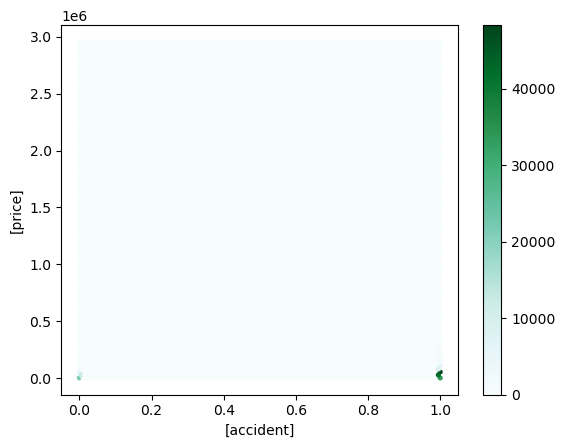

In [22]:
df.plot(kind='hexbin',x=['accident'],y=['price'])

In [23]:
df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,31,495,2007,213000,2,116,38,312,71,1,0,4200
1,28,930,2002,143250,2,366,38,263,10,0,0,4999
2,9,1575,2002,136731,1,640,38,38,71,1,0,13900
3,16,758,2017,19500,2,863,49,29,14,1,0,45000
4,36,1077,2021,7388,2,259,23,29,10,1,0,97500
...,...,...,...,...,...,...,...,...,...,...,...,...
188528,8,604,2017,49000,2,866,49,304,10,1,0,27500
188529,36,206,2018,28600,2,770,31,304,14,0,0,30000
188530,36,223,2021,13650,2,921,23,304,14,1,0,86900
188531,3,1471,2022,13895,2,512,1,82,14,1,0,84900


In [90]:
X=df.drop(['price','ext_col','int_col'],axis=1)

In [91]:
y=df['price']

In [92]:
X_train,X_df,y_train,y_df=train_df_split(X,y,df_size=0.3,random_state=42)

In [93]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_df_scaled=scaler.fit_transform(X_df)

In [94]:
X

,brand,model,model_year,milage,fuel_type,engine,transmission,accident,clean_title
0,31,495,2007,213000,2,116,38,1,0
1,28,930,2002,143250,2,366,38,0,0
2,9,1575,2002,136731,1,640,38,1,0
3,16,758,2017,19500,2,863,49,1,0
4,36,1077,2021,7388,2,259,23,1,0
...,...,...,...,...,...,...,...,...,...
188528,8,604,2017,49000,2,866,49,1,0
188529,36,206,2018,28600,2,770,31,0,0
188530,36,223,2021,13650,2,921,23,1,0
188531,3,1471,2022,13895,2,512,1,1,0


In [110]:
model=XGBRegressor(n_estimators=10,random_state=42)
model.fit(X_train,y_train)
from sklearn.metrics import mean_absolute_error as mae
y_preds=model.predict(X_train)
y_preds_df=model.predict(X_df)
print(f'Training Error:{mae(y_preds,y_train)}')
print(f'dfing Error:{mae(y_preds_df,y_df)}')

Training Error:19433.002929036324
Testing Error:19623.049081848232


In [96]:
models=[LinearRegression(),XGBRegressor()]

for i in range(len(models)):
    models[i].fit(X_train_scaled,y_train)
    print(f'{models[i]}: ')

    train_preds=models[i].predict(X_train_scaled)
    print('Training Accuracy: ' , mae(y_train,train_preds))

    y_preds=models[i].predict(X_df_scaled)
    print('Validation Accuracy: ',mae(y_df,y_preds))
    print()

LinearRegression(): 
Training Accuracy:  23383.32529788664
Validation Accuracy:  23108.589242804253

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...): 
Training Accuracy:  18177.92603103996
Validation Accuracy:  28995.001956907865



In [118]:
test=pd.read_csv(r"C:\Users\Frhnx\Downloads\playground-series-s4e9\test.csv")

In [119]:
test

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes
125686,314219,Audi,Q7 55 Prestige,2019,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,NaN
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
125688,314221,Audi,Q7 3.0T Premium,2012,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes


In [120]:
test['fuel_type'].fillna(test['fuel_type'].mode()[0],inplace=True)
test['accident'].fillna(test['accident'].mode()[0],inplace=True)
test['clean_title'].fillna(test['clean_title'].mode()[0],inplace=True)

C:\Users\Frhnx\AppData\Local\Temp\ipykernel_26556\368023445.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['fuel_type'].fillna(test['fuel_type'].mode()[0],inplace=True)
C:\Users\Frhnx\AppData\Local\Temp\ipykernel_26556\368023445.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [121]:
b_encoder=LabelEncoder()
test['brand']=b_encoder.fit_transform(test['brand'])
m_encoder=LabelEncoder()
test['model']=m_encoder.fit_transform(test['model'])
f_encoder=LabelEncoder()
test['fuel_type']=f_encoder.fit_transform(test['fuel_type'])
e_encoder=LabelEncoder()
test['engine']=e_encoder.fit_transform(test['engine'])
t_encoder=LabelEncoder()
test['transmission']=t_encoder.fit_transform(test['transmission'])
e2_encoder=LabelEncoder()
test['ext_col']=e2_encoder.fit_transform(test['ext_col'])
i_encoder=LabelEncoder()
test['int_col']=i_encoder.fit_transform(test['int_col'])
a_encoder=LabelEncoder()
test['accident']=a_encoder.fit_transform(test['accident'])
c_encoder=LabelEncoder()
test['clean_title']=c_encoder.fit_transform(test['clean_title'])

In [130]:
Xt=test.drop(['id','ext_col','int_col'],axis=1)

In [131]:
Xt

,brand,model,model_year,milage,fuel_type,engine,transmission,accident,clean_title
0,26,1388,2015,98000,2,326,16,1,0
1,26,1375,2020,9142,3,787,31,1,0
2,14,636,2022,28121,2,541,3,1,0
3,3,182,2016,61258,2,193,39,1,0
4,3,181,2018,59000,2,365,38,1,0
...,...,...,...,...,...,...,...,...,...
125685,36,759,2014,83315,2,732,23,1,0
125686,3,1248,2019,29336,2,511,39,1,0
125687,3,184,2012,77634,2,673,38,1,0
125688,3,1244,2012,112000,2,673,38,1,0


In [132]:
y_preds=model.predict(Xt)

In [133]:
y_preds

array([18824.05 , 77444.41 , 62847.586, ..., 24793.988, 19485.52 ,
       37121.805], dtype=float32)

In [134]:
test['Prediction']=y_preds

In [136]:
Xs=test[['id','Prediction']]

In [137]:
Xs

,id,Prediction
0,188533,18824.050781
1,188534,77444.406250
2,188535,62847.585938
3,188536,22857.121094
4,188537,30514.914062
...,...,...
125685,314218,24661.652344
125686,314219,48875.859375
125687,314220,24793.988281
125688,314221,19485.519531


In [138]:
Xs.to_csv('submissionusedcars.csv',index=False)